In [34]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [35]:
import numpy as np
import pandas as pd

In [36]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [37]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [38]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [39]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)


In [40]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [54]:
# Save references to each table
Measurements = Base.classes.measurement
Stations = Base.classes.station

In [55]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [113]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
earliest = session.query(Measurements.date).order_by(Measurements.date).first()
latest = session.query(Measurements.date).order_by(Measurements.date.desc()).first()
print(f"Earliest: {earliest[0]} , Latest: {latest[0]}")

latestdate = dt.datetime.strptime(latest[0], '%Y-%m-%d')
# Calculate the date 1 year ago from the last data point in the database
prev_year = dt.date(latestdate.year -1, latestdate.month, latestdate.day)
prev_year

# Perform a query to retrieve the data and precipitation scores
selected_data = [Measurements.date,Measurements.prcp]
query_data = session.query(*selected_data).filter(Measurements.date >= querydate).all()

# Save the query results as a Pandas DataFrame 
precip_analysis = pd.DataFrame(query_data, columns=['Date','Precipitation'])
# Remove bad data
precip_analysis = precip_analysis.dropna(how='any') 
# Sort the dataframe by date
precip_analysis = precip_analysis.sort_values(["Date"], ascending=True)
#Set Index to Date column
precip_analysis = precip_analysis.set_index("Date")
precip_analysis.head()






Earliest: 2010-01-01 , Latest: 2017-08-23


,Precipitation
Date,
2016-08-23,0.00
2016-08-23,0.02
2016-08-23,0.05
2016-08-23,0.70
2016-08-23,0.15


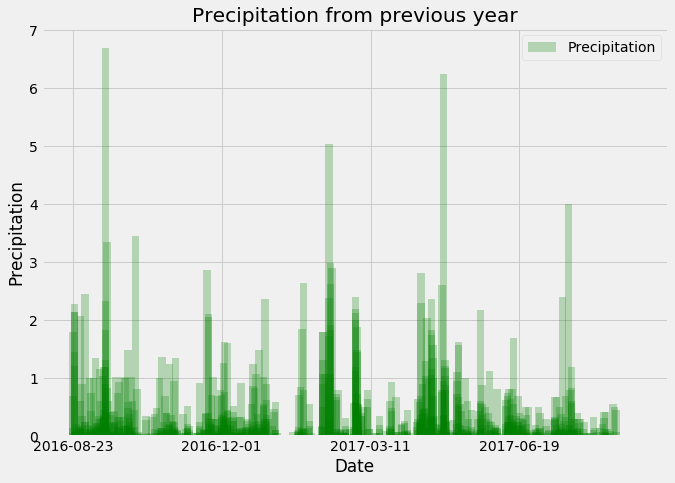

In [104]:
# Use Pandas Plotting with Matplotlib to plot the data

xaxis = precip_analysis.index.tolist()
yaxis = precip_analysis['Precipitation'].tolist()

plt.figure(figsize=(10,7))
plt.bar(xaxis,yaxis,width = 5 ,color='green', alpha=0.25, align="center",label='Precipitation')
major_ticks = np.arange(0,500,100)
plt.xticks(major_ticks)

plt.title(f"Precipitation from previous year")
plt.xlabel("Date")
plt.ylabel("Precipitation")
plt.grid(which='both', axis='both', linestyle='solid')
plt.legend()
plt.show()

In [93]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precip_analysis.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [94]:
# Design a query to show how many stations are available in this dataset?
session.query(Station.id).count() 

9

In [105]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
select_stations = [Measurements.station,func.count(Measurements.id)]
station_list = session.query(*select_stations).\
    group_by(Measurements.station).\
    order_by(func.count(Measurements.id).desc()).all()
station_list

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [114]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
temps = [func.min(Measurements.tobs),func.max(Measurements.tobs),func.avg(Measurements.tobs)]
mostactivestationdata = session.query(*temps).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.id).desc()).first()
mostactivestationdata


(54.0, 85.0, 71.66378066378067)

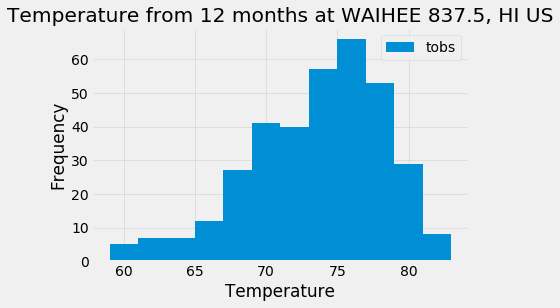

In [124]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
station_data = session.query(Measurements.tobs).\
    filter(Measurements.station == activestations[0][0]).\
    filter(Measurements.date >= prev_year).all()
temperatures = list(np.ravel(station_data))

station_data = [Station.station,Station.name,Station.latitude,Station.longitude,Station.elevation]
queryresult = session.query(*station_data).all()
stations_desc = pd.DataFrame(queryresult, columns=['Station','Name','Latitude','Longitude','Elevation'])

stationname = stations_desc.loc[stations_desc["Station"] == activestations[0][0],"Name"].tolist()[0]

plt.hist(temperatures, bins=12,rwidth=1.0,label='tobs')
plt.grid(axis='both', alpha=0.5)
plt.ylabel('Frequency')
plt.xlabel('Temperature')
plt.title(f"Temperature from 12 months at {stationname}")
plt.legend()


## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates


In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)



In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
